### • DOMAIN:
Semiconductor manufacturing process
### • CONTEXT: 
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.
### • DATA DESCRIPTION: 
sensor-data.csv : (1567, 592)
The data consists of 1567 examples each with 591 features. 
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
### • PROJECT OBJECTIVE: 
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

### Importing Libraries

In [1]:
# import libraries for numbers and dataframes
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid') # set styles for seaborn plots

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import Libraries for Statistical testing
from scipy.stats import ttest_ind,pearsonr

# import Libraries for balancing the Target variable.
from imblearn.over_sampling import SMOTE

# import skelarn Libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline

# import libraries for Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.decomposition import PCA


### 1. Import and Explore the data.

In [2]:
# import the data
signal_data = pd.read_csv('signal-data.csv')

In [3]:
# lets see head of the data
signal_data.head()

# observation : we have 592 columns and have some missing values in tha data

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [4]:
# Explore shape and size of the data
print(signal_data.shape)
print(signal_data.size)

# Observation : data contains 1567 rows and 592 columns. data contains 924664 values.

(1567, 592)
927664


In [5]:
# let's see info of the data
signal_data.info()

# Observation : there are 590 columns float64 type datatype,1 column of int64 type and 1 column of object dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


### 2. Data cleansing:

In [6]:
# drop the Column Time which is not used for modelling.
signal_data.drop('Time',axis=1,inplace=True)

In [7]:
# check for null values in the data
signal_data.isnull().sum().sum()
# Observation : We have 41951 null values in the data

41951

<AxesSubplot:ylabel='None'>

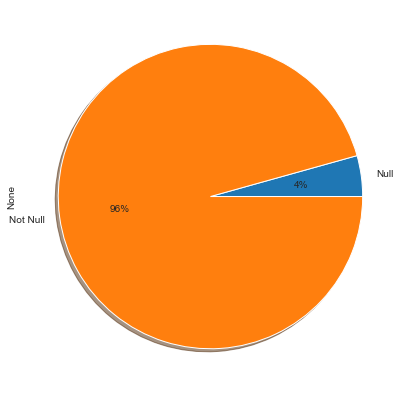

In [8]:
# plot a pie plot for null and non null values in the data.
plt.figure(figsize=(10,7))
pd.Series({'Null':signal_data.isnull().sum().sum(),'Not Null':signal_data.size}).plot.pie(autopct='%1.f%%',shadow=True)

# Observation : We have 4% Null values in the data.So, Replace them with 0.

In [9]:
# check for null values in the Every column.
# drop the column if they have > 400 null values then drop the column.
# Replace with 0 if Null values are <400.
# Because, sometimes semiconductor may be not recieving any signal so that is stores as Nan Value.

cols = signal_data.columns.drop(['Pass/Fail'])
for i in cols:
    null_values = signal_data[i].isna().sum()
    if null_values > 700:
        print('For Column :',i,'\n',signal_data[i].isna().sum(),' Null Values\n')
        signal_data.drop(i,inplace=True,axis=1)
    else:
        signal_data[i].fillna(signal_data[i].median(),inplace=True)

For Column : 72 
 794  Null Values

For Column : 73 
 794  Null Values

For Column : 85 
 1341  Null Values

For Column : 109 
 1018  Null Values

For Column : 110 
 1018  Null Values

For Column : 111 
 1018  Null Values

For Column : 112 
 715  Null Values

For Column : 157 
 1429  Null Values

For Column : 158 
 1429  Null Values

For Column : 220 
 1341  Null Values

For Column : 244 
 1018  Null Values

For Column : 245 
 1018  Null Values

For Column : 246 
 1018  Null Values

For Column : 247 
 715  Null Values

For Column : 292 
 1429  Null Values

For Column : 293 
 1429  Null Values

For Column : 345 
 794  Null Values

For Column : 346 
 794  Null Values

For Column : 358 
 1341  Null Values

For Column : 382 
 1018  Null Values

For Column : 383 
 1018  Null Values

For Column : 384 
 1018  Null Values

For Column : 385 
 715  Null Values

For Column : 492 
 1341  Null Values

For Column : 516 
 1018  Null Values

For Column : 517 
 1018  Null Values

For Column : 518 
 101

In [10]:
# check for shape of the data After Dropping the columns
signal_data.shape

# Observation : so, we dropped 32 columns Which have 400+ null values.

(1567, 559)

In [11]:
# replace -1 as 0 for better understanding
# so, 0-Pass, 1-Fail and convert to category type.

signal_data['Pass/Fail'] = signal_data['Pass/Fail'].replace({-1:0}).astype('category')

In [12]:
# make a copy of original dataset
signal_data_dup = signal_data

### 3. Data analysis & visualisation

#### Statistical Anlysis

In [13]:
# lets see the Mean values for pass/fail Semiconductors
signal_data.groupby('Pass/Fail').mean()

# Observation : Mean Values ar different in starting columns for pass or Fail conductors. 

0            1            2            3         4  \
Pass/Fail                                                                 
0          3014.933137  2495.920465  2200.559783  1398.198657  4.375149   
1          3007.526250  2495.101490  2200.441877  1355.781435  1.303405   

               5           6         7         8         9  ...       576  \
Pass/Fail                                                   ...             
0          100.0  101.089854  0.121794  1.462308 -0.000716  ...  5.692230   
1          100.0  101.490972  0.122257  1.470619 -0.002608  ...  3.756328   

                 577       582       583       584       585       586  \
Pass/Fail                                                                
0          16.807529  0.500054  0.015289  0.003841  3.062815  0.021444   
1          14.318917  0.500696  0.015703  0.003922  3.135344  0.021651   

                587       588        589  
Pass/Fail                                 
0          0.016391  0.005259  99.717468  
1          0.017643  0.005618  98.736237  

[2 rows x 558 columns]

#### Two-Sample t-test

Statistical Testing for continuous features with target variable.
Here we use two-sample unpaired t-test
* $H_0$: There is no significant difference for Mean of Continuous variable with target variable.
* $H_A$: There is a significance difference for Mean of Continuous variable to with target variable.

Target variable : Pass/Fail column in the data.

Continuous Variables : 0-589 columns in the data.

Here We consider 5% Significance Level.If p-value>0.05 then We drop the columns. Because mean values are same for both the pass or fail groups Which are Use less for the Modeling.

In [14]:
# Two-sample t-test
count=0
for i in signal_data.columns.drop('Pass/Fail'):
    pass_group = np.array(signal_data[signal_data['Pass/Fail']==0][i])
    fail_group = np.array(signal_data[signal_data['Pass/Fail']==1][i])
    t,p_value = ttest_ind(pass_group,fail_group,axis=0,equal_var=False)
    if p_value < 0.05:
        continue
    else:
        print('Means are same for Column :',i)
        signal_data.drop([i],axis=1,inplace=True)
        count +=1

print('Total no of Columns dropped using Two sample t-test :',count)

Means are same for Column : 0
Means are same for Column : 1
Means are same for Column : 2
Means are same for Column : 3
Means are same for Column : 5
Means are same for Column : 6
Means are same for Column : 7
Means are same for Column : 8
Means are same for Column : 9
Means are same for Column : 10
Means are same for Column : 11
Means are same for Column : 12
Means are same for Column : 13
Means are same for Column : 15
Means are same for Column : 16
Means are same for Column : 17
Means are same for Column : 18
Means are same for Column : 20
Means are same for Column : 22
Means are same for Column : 23
Means are same for Column : 24
Means are same for Column : 25
Means are same for Column : 26
Means are same for Column : 27
Means are same for Column : 29
Means are same for Column : 30
Means are same for Column : 32
Means are same for Column : 33
Means are same for Column : 34
Means are same for Column : 35
Means are same for Column : 36
Means are same for Column : 37
Means are same fo

Means are same for Column : 336
Means are same for Column : 337
Means are same for Column : 338
Means are same for Column : 339
Means are same for Column : 340
Means are same for Column : 341
Means are same for Column : 342
Means are same for Column : 343
Means are same for Column : 344
Means are same for Column : 347
Means are same for Column : 349
Means are same for Column : 350
Means are same for Column : 351
Means are same for Column : 352
Means are same for Column : 353
Means are same for Column : 354
Means are same for Column : 355
Means are same for Column : 356
Means are same for Column : 357
Means are same for Column : 359
Means are same for Column : 360
Means are same for Column : 361
Means are same for Column : 362
Means are same for Column : 363
Means are same for Column : 364
Means are same for Column : 365
Means are same for Column : 366
Means are same for Column : 367
Means are same for Column : 368
Means are same for Column : 369
Means are same for Column : 370
Means ar

#### Data Analysis

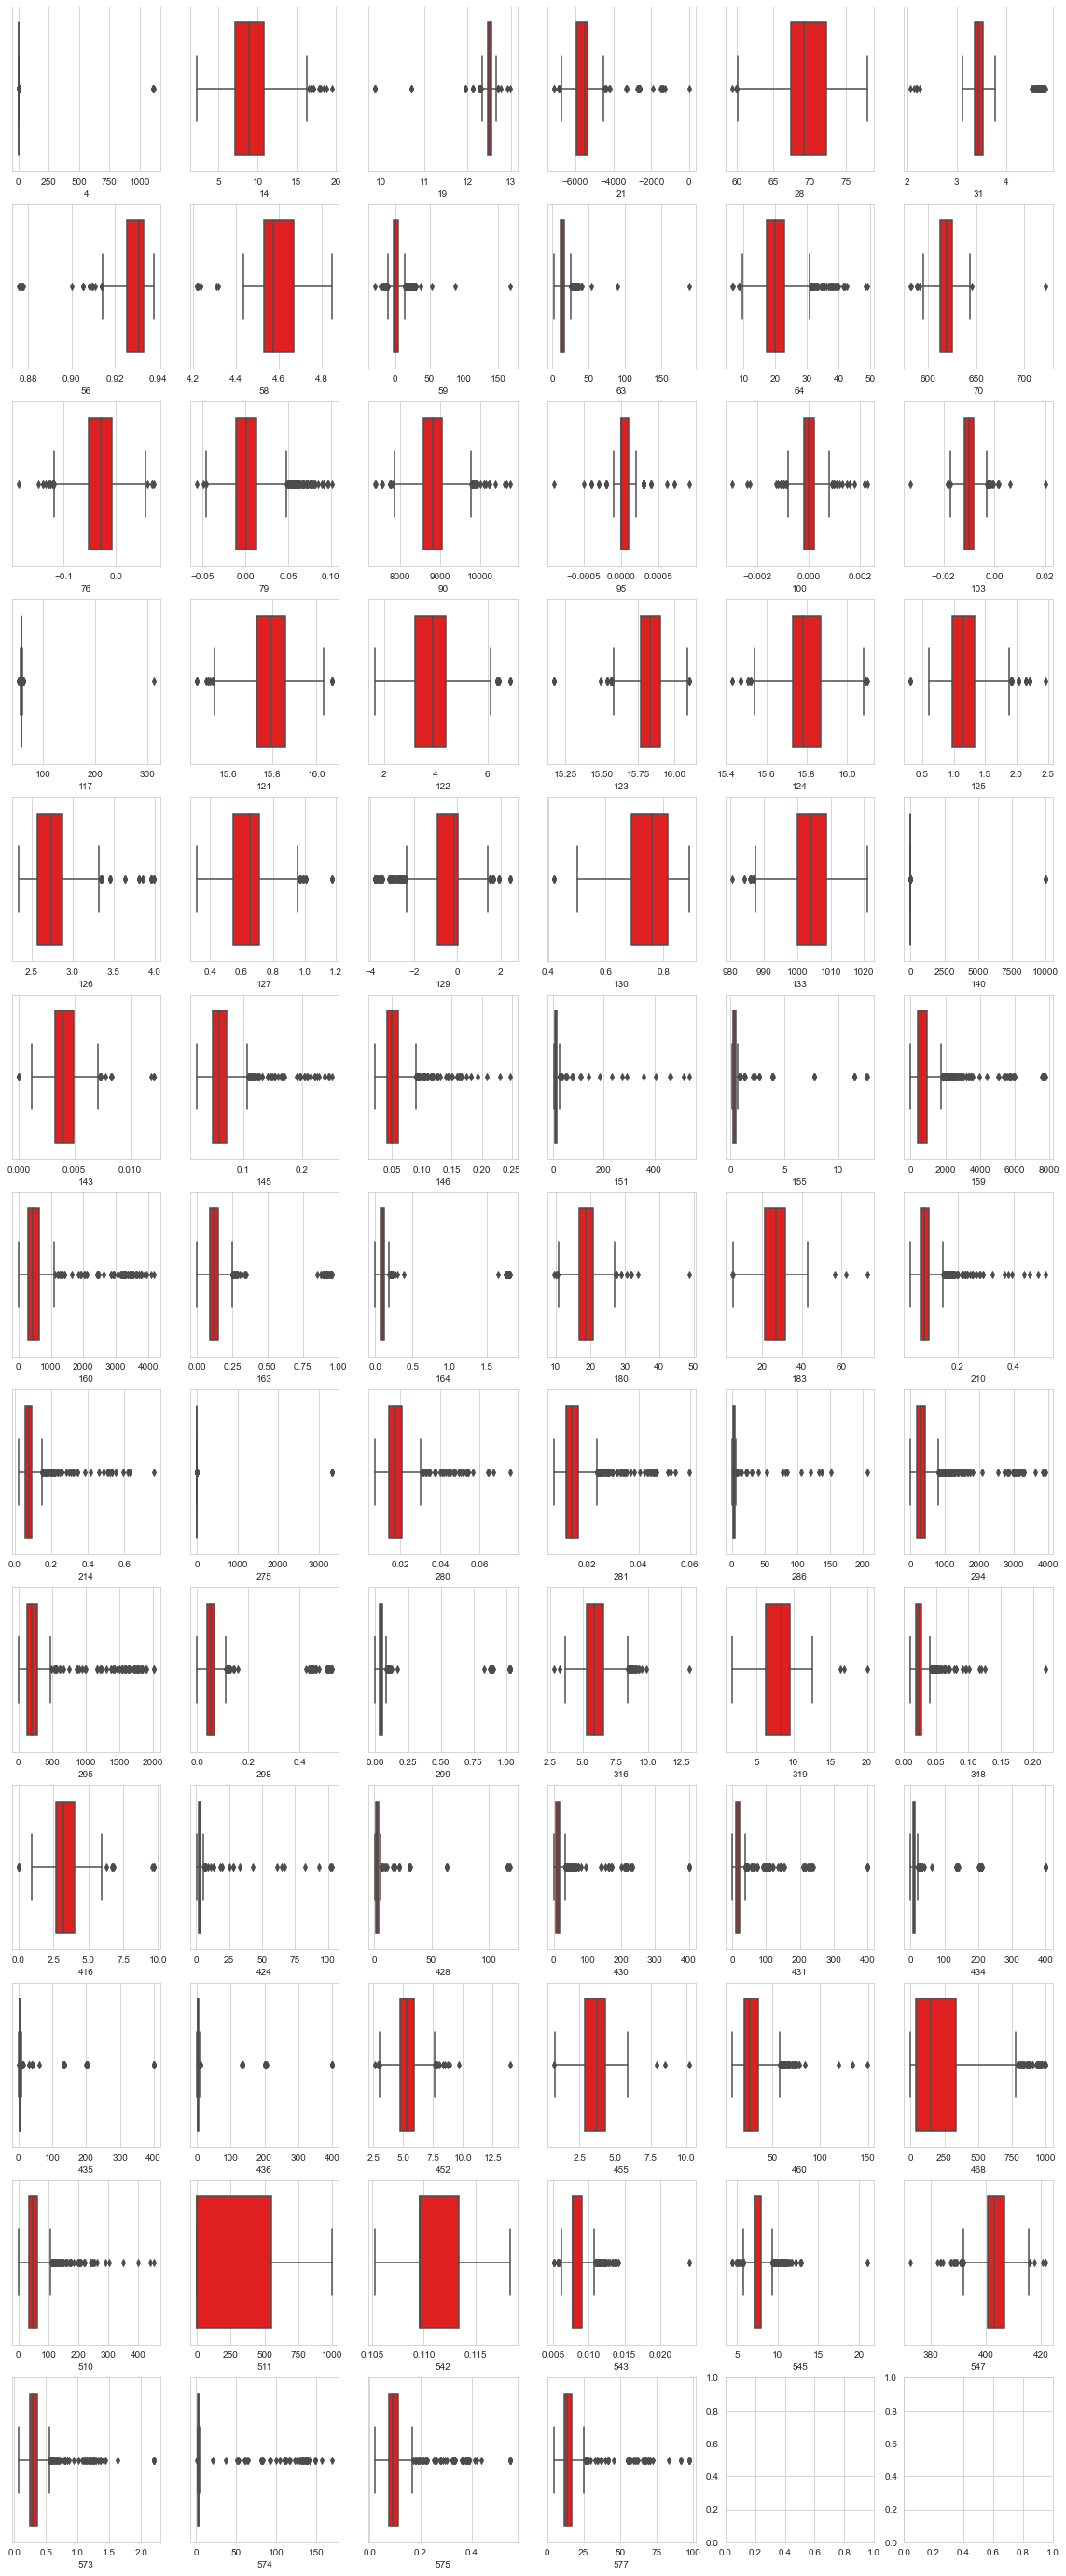

In [15]:
# plot Box plots for Numerical Columns in data.
cols = signal_data.columns.drop('Pass/Fail')
j,k=0,0
fig,ax = plt.subplots(13,6,figsize=(20,50))
for i in cols:
    if j<13:
        if k<6:
            sns.boxplot(signal_data[i],ax=ax[j][k],color='red')
            k+=1
        else:
            j+=1
            k=0
            sns.boxplot(signal_data[i],ax=ax[j][k],color='red')
            k+=1

Observation : From above plots we have seen that All columns have ouliers in the data and have different ranges.So, we should handle ouliers in futures steps before fiting the data to model.

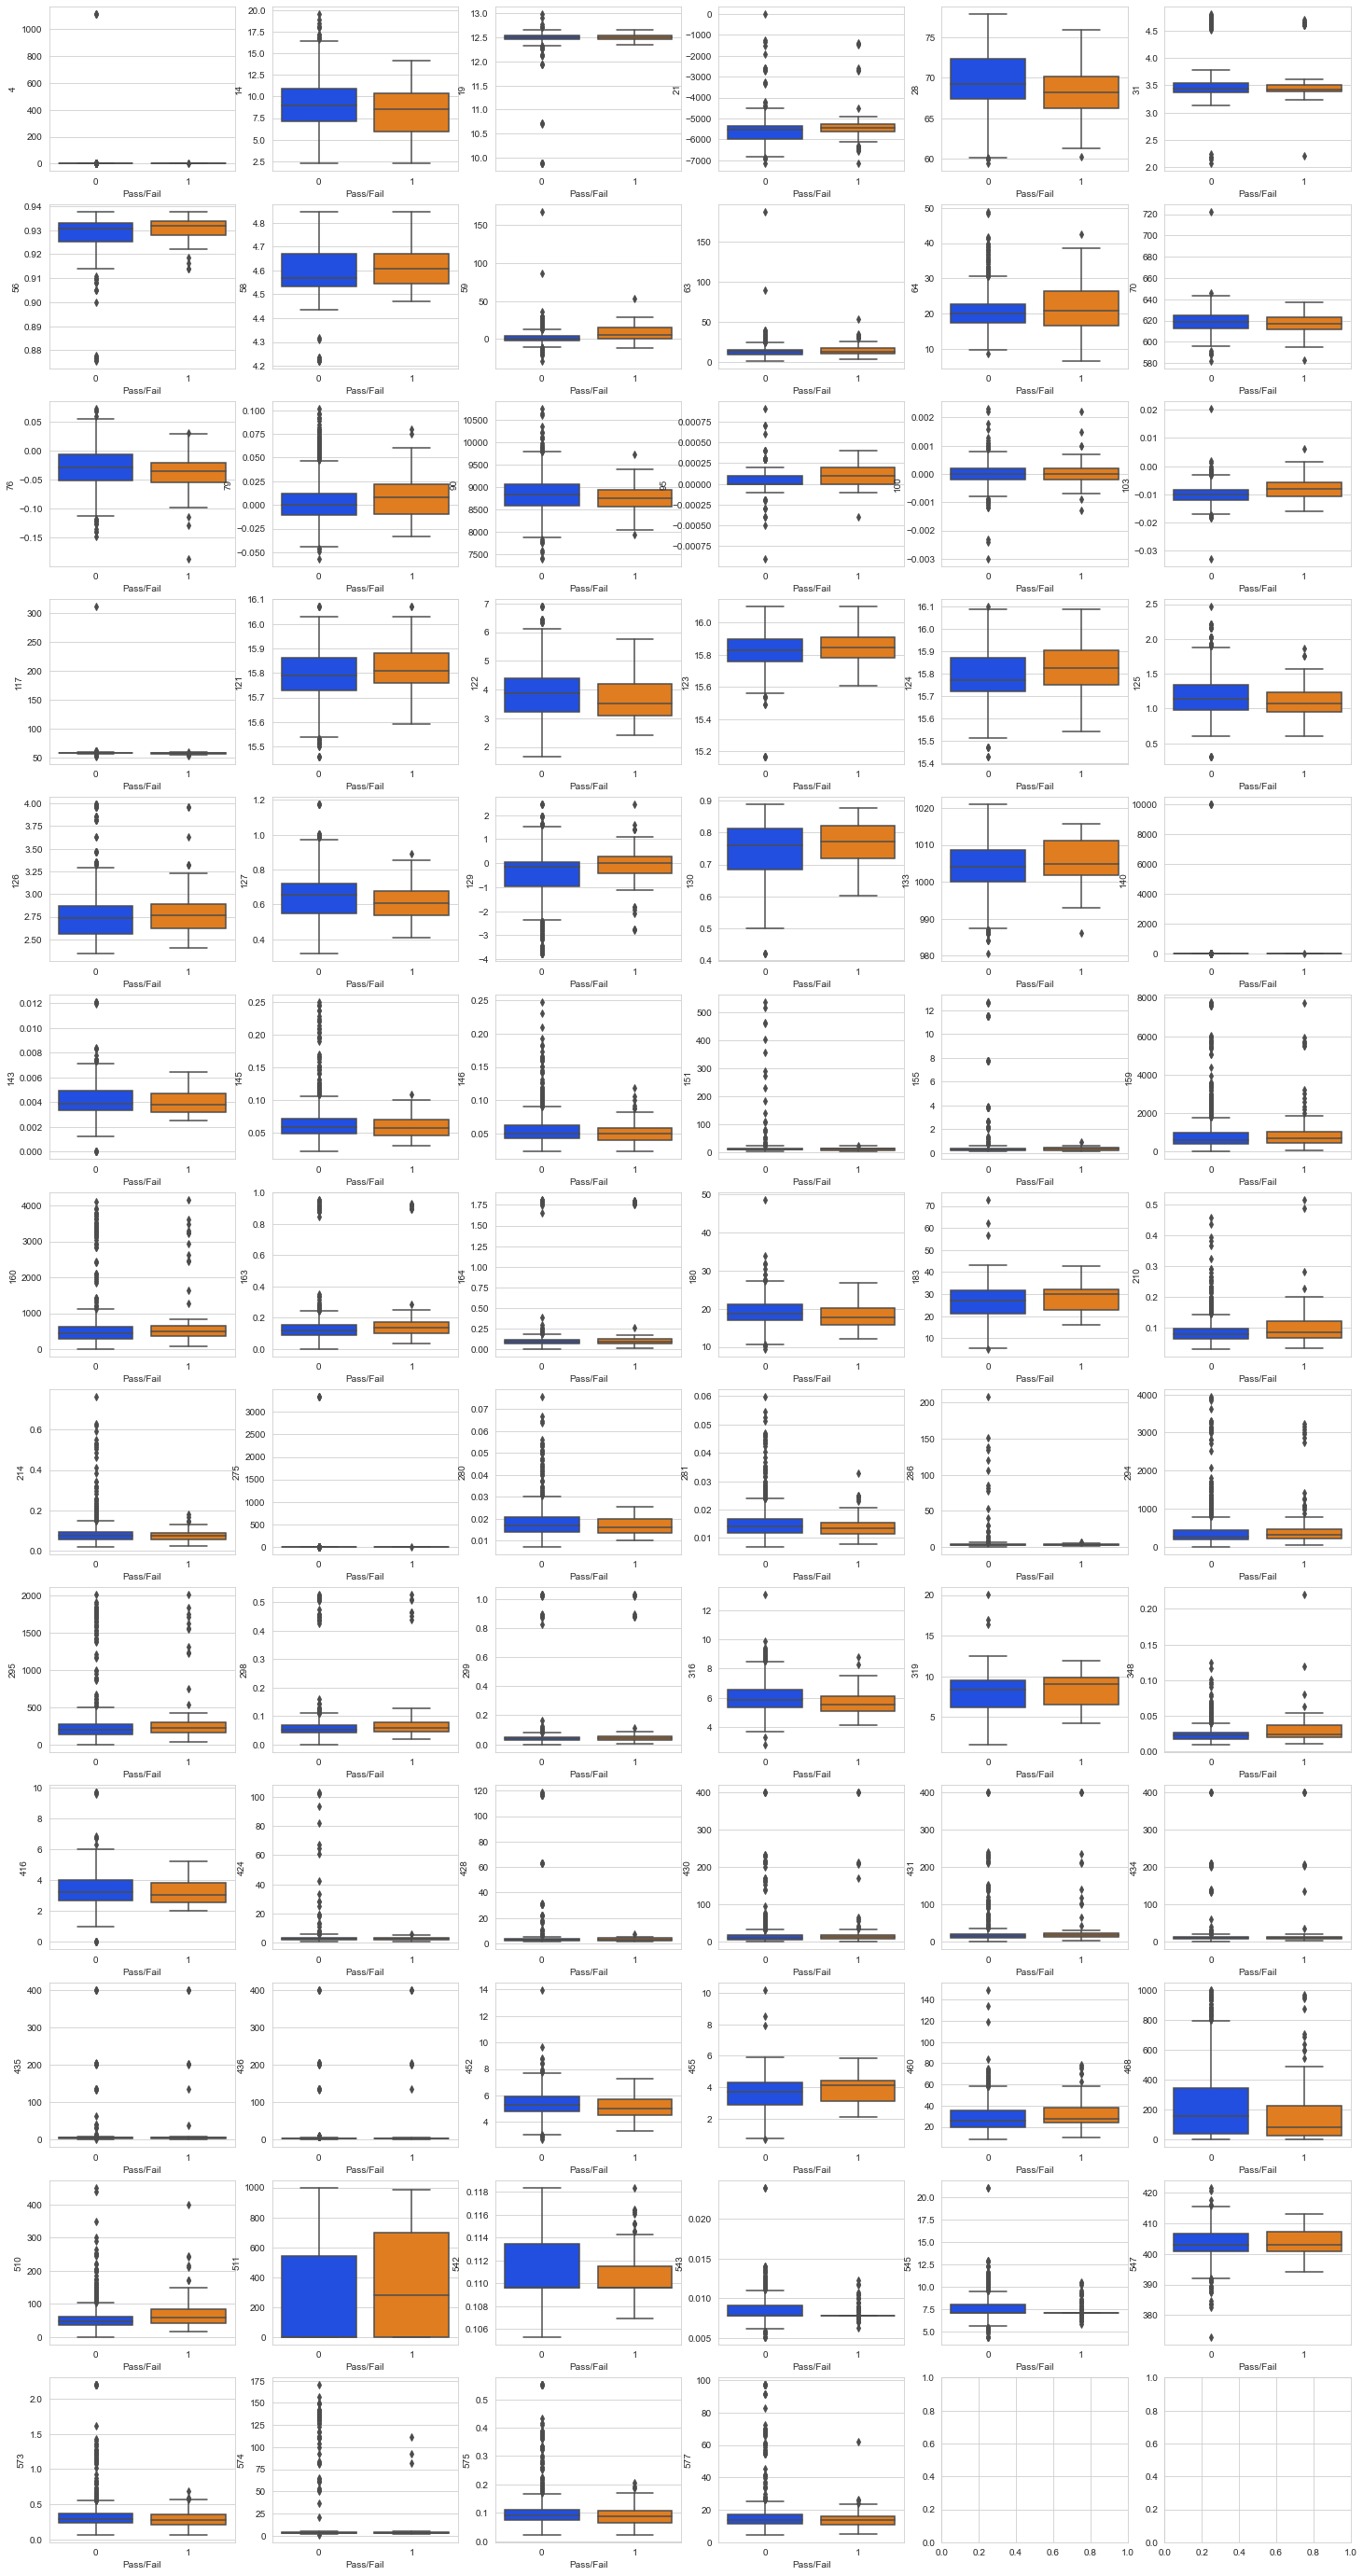

In [16]:
# plot Box plots for Numerical Columns in data.
cols = signal_data.columns.drop('Pass/Fail')
j,k=0,0
fig,ax = plt.subplots(13,6,figsize=(25,50))
for i in cols:
    if j<13:
        if k<6:
            sns.boxplot(data = signal_data,x='Pass/Fail',y=i,ax=ax[j][k],palette='bright')
            k+=1
        else:
            j+=1
            k=0
            sns.boxplot(data = signal_data,x='Pass/Fail',y=i,ax=ax[j][k],palette='bright')
            k+=1

Observation : From above plots we can see in all attributes Q1,Q3 values are different in two classes.so, Predicting using these columns Will be give good accuracies.Some of the plots have same range boxplots because they are high correlated columns.so, lets check in heatmap for correlation of the columns.

<AxesSubplot:>

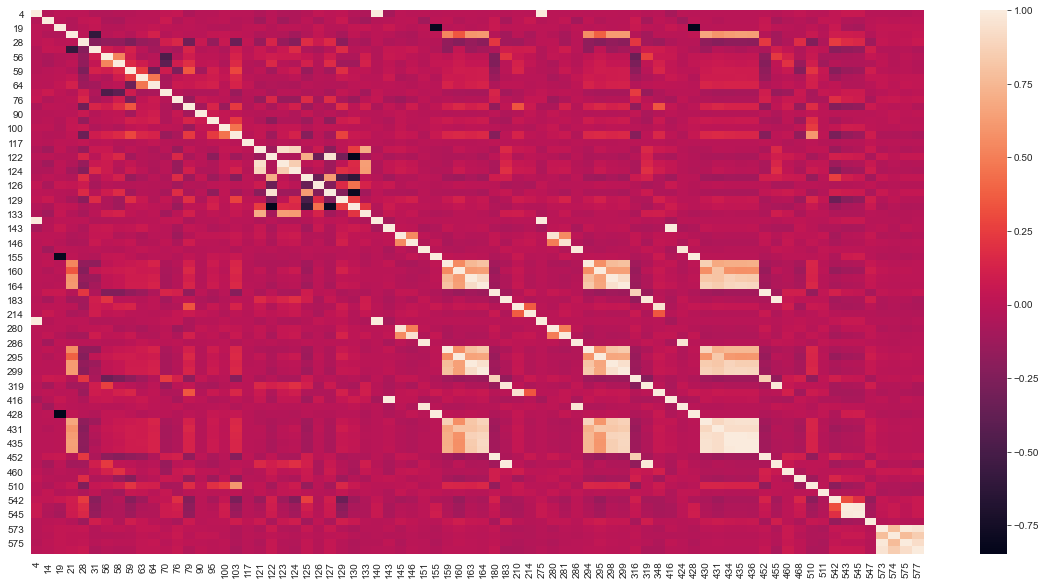

In [17]:
# heatmap for the data
plt.figure(figsize=(20,10))
sns.heatmap(signal_data.corr())

Observation : We have high correlation columns in our data. and som eof the boxes are in bright color they are could be high correlated columns. so, drop them in future steps for better analysis.

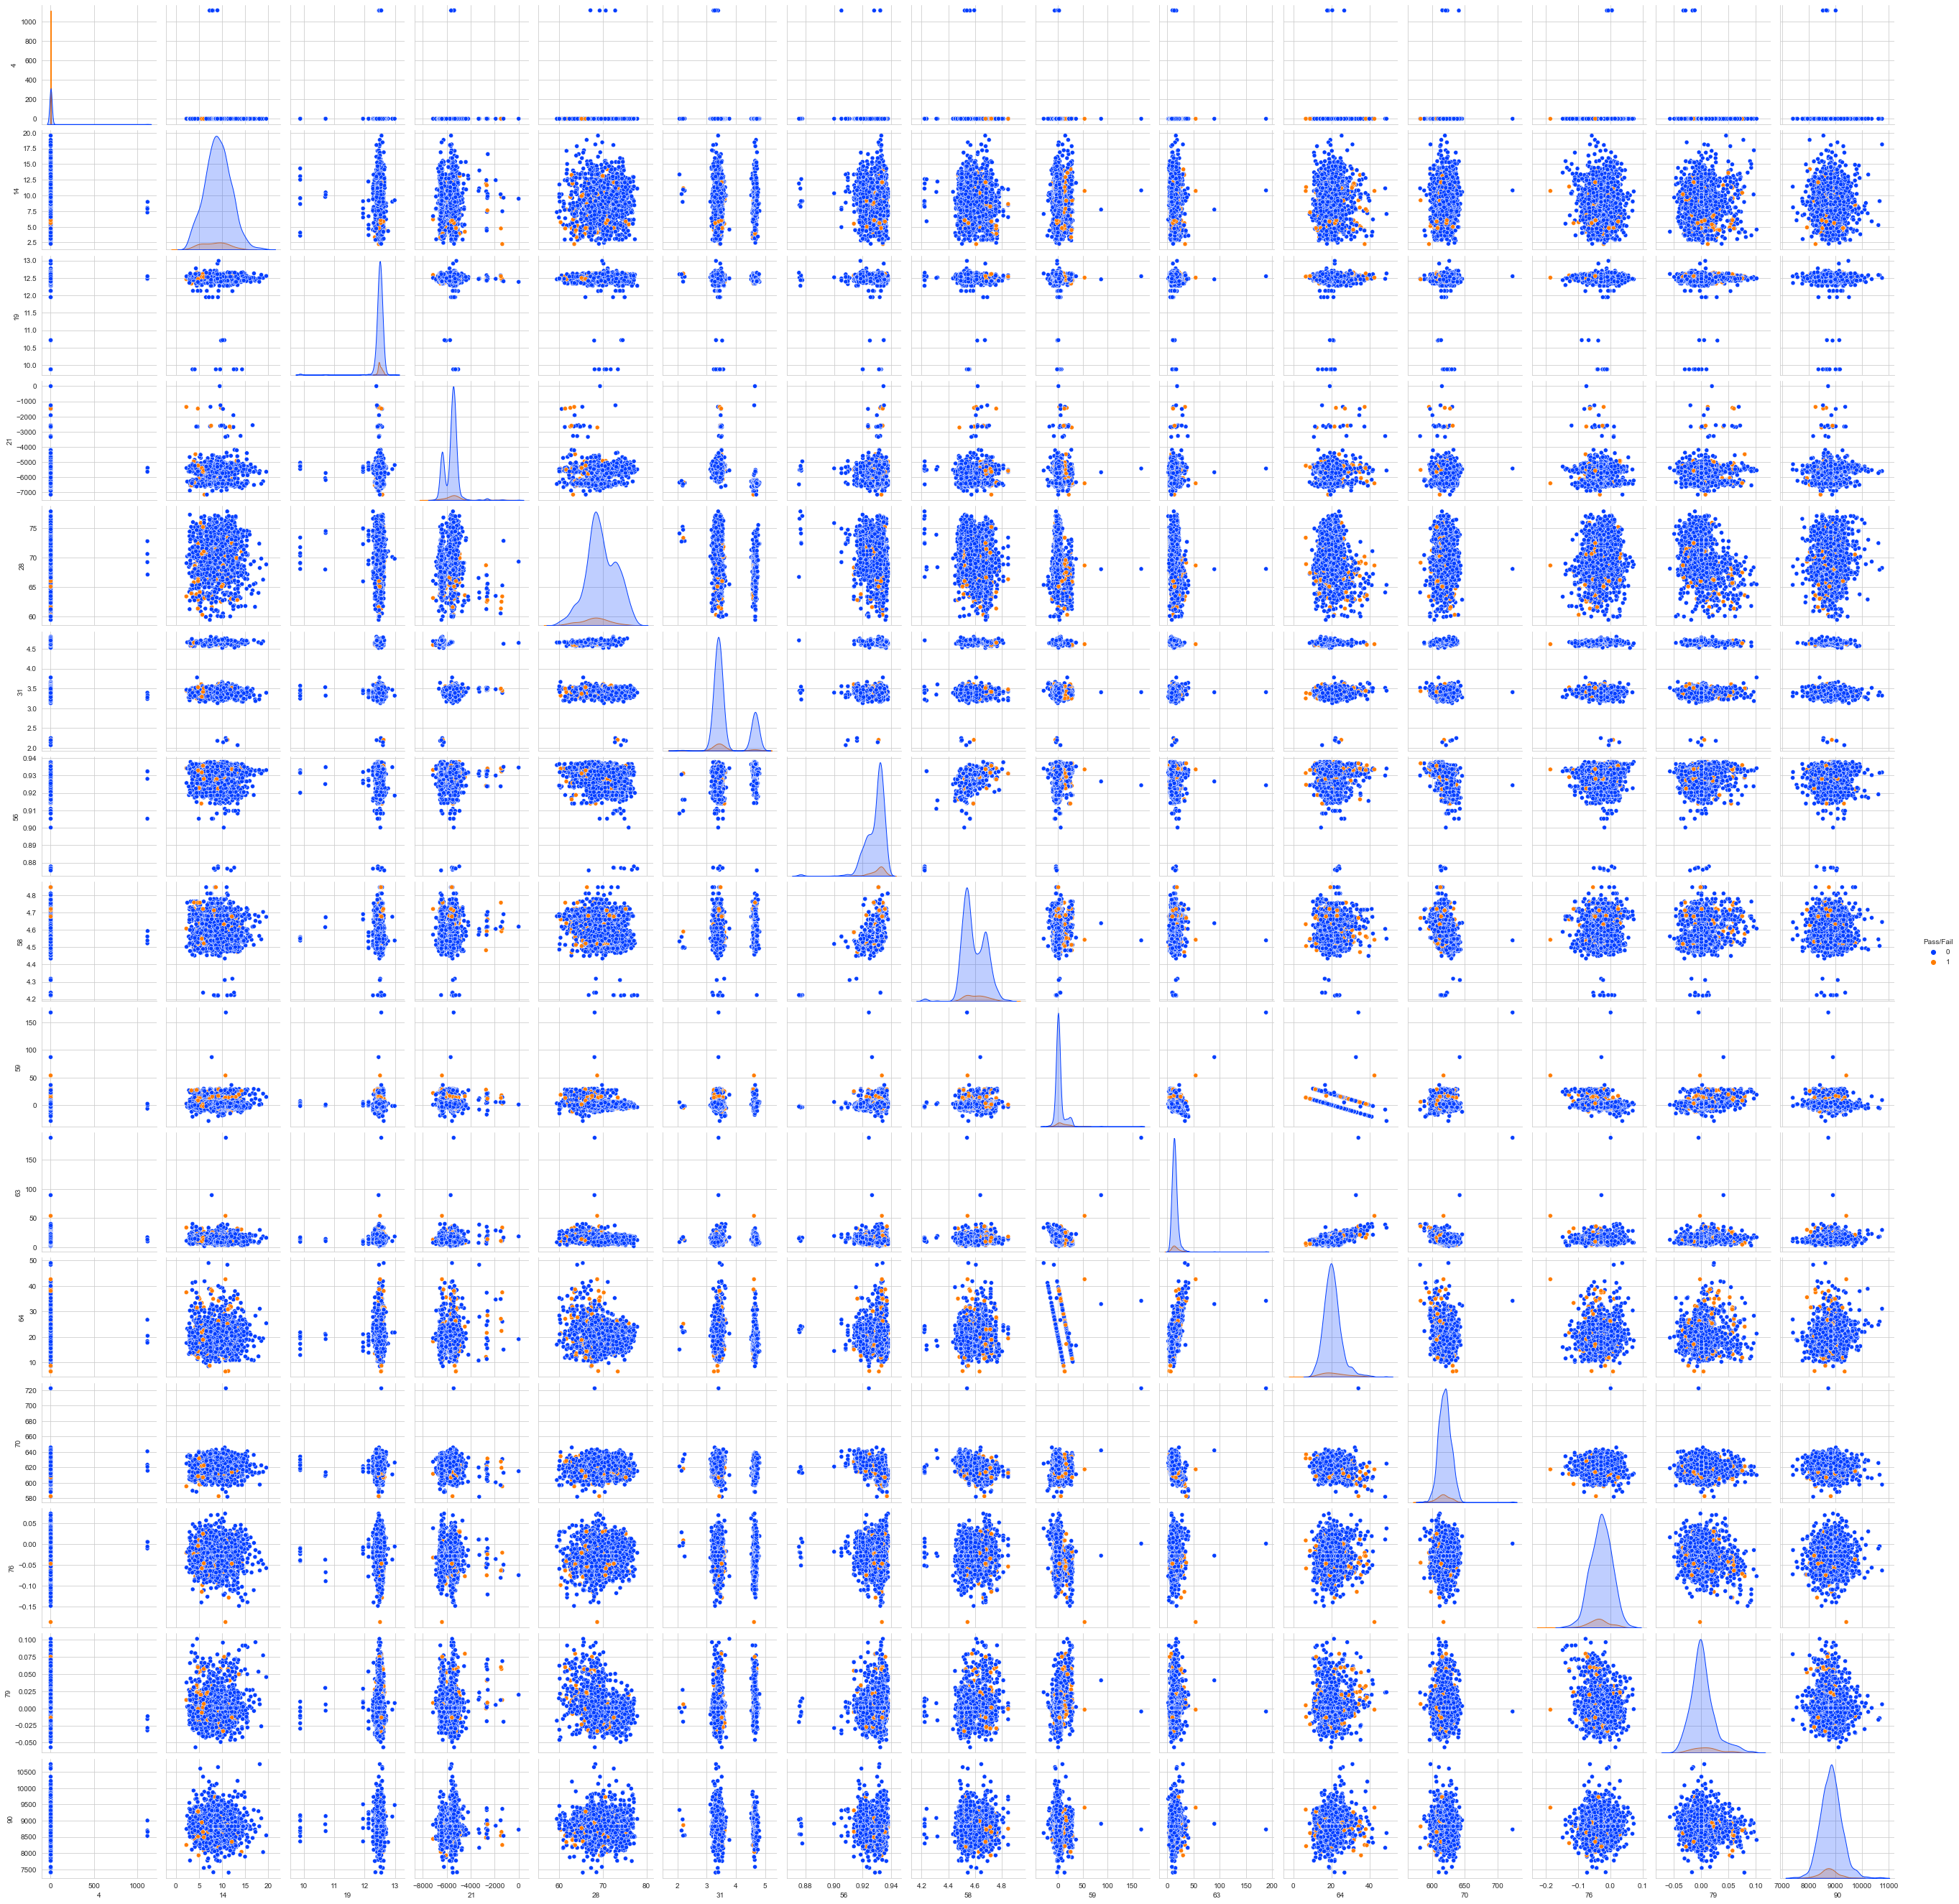

In [18]:
# plotting a pair plot for first 15 columns.
pair = signal_data.iloc[::,:15]
pair['Pass/Fail'] = signal_data['Pass/Fail']
sns.pairplot(pair,hue='Pass/Fail',palette='bright')

 Observation : From above pairplot We cannot see no column has linear relationship and have three clusters in the data.

### 4. Data pre-processing

#### Handling outliers

In [19]:
# From Above plots We seen there are outliers in the Dataset
# replace the outliers with the median of the data.

columns = signal_data.iloc[:,:-1].columns
count = 0
for col in columns:
    # 1st quartile
    Q1 = np.percentile(signal_data[col],25)
    # 3rd quartile
    Q3 = np.percentile(signal_data[col],75)
    # IQR
    IQR = Q3 - Q1
    # upper Bound
    upper = Q3 + 1.5*IQR
    # Lower bound
    lower = Q1-1.5*IQR
    # Count for Outliers before converting
    count += signal_data[col].loc[(signal_data[col] > upper) | (signal_data[col] < lower)].count()
    # replacing median in outliers
    signal_data[col]= signal_data[col].mask(signal_data[col] > upper, signal_data[col].median())
    signal_data[col]= signal_data[col].mask(signal_data[col] < lower, signal_data[col].median())
print('Total outliers in the data are:',count)

Total outliers in the data are: 4702


#### Dropping High correlated columns

In [20]:
# from above analysis we have seen that columns have high relation.
# find the high correlated columns and drop the columns.

corr_cols = []
# Apply the pearsonr()
for i in signal_data.columns:
    for j in signal_data.columns:
        corr, _ = pearsonr(signal_data[i],signal_data[j])
        if corr >= 0.90:
            if i!=j and j>i:
                corr_cols.append(j)
                print('Pearsons correlation: %.2f' % corr,'columns are :',i,j)

Pearsons correlation: 0.94 columns are : 122 127
Pearsons correlation: 0.96 columns are : 140 275
Pearsons correlation: 0.95 columns are : 143 416
Pearsons correlation: 0.95 columns are : 151 286
Pearsons correlation: 0.99 columns are : 151 424
Pearsons correlation: 1.00 columns are : 155 428
Pearsons correlation: 0.97 columns are : 159 294
Pearsons correlation: 0.94 columns are : 159 430
Pearsons correlation: 0.98 columns are : 160 295
Pearsons correlation: 0.96 columns are : 160 431
Pearsons correlation: 0.95 columns are : 163 298
Pearsons correlation: 0.91 columns are : 163 434
Pearsons correlation: 0.95 columns are : 164 299
Pearsons correlation: 0.99 columns are : 164 435
Pearsons correlation: 0.99 columns are : 180 452
Pearsons correlation: 0.98 columns are : 183 319
Pearsons correlation: 0.99 columns are : 183 455
Pearsons correlation: 0.94 columns are : 286 424
Pearsons correlation: 0.93 columns are : 294 430
Pearsons correlation: 0.96 columns are : 295 431
Pearsons correlation

In [21]:
# drop the columns which have high correlation.
signal_data.drop(corr_cols,axis=1,inplace=True)
print(signal_data.shape)
# observation : we have dropped 35 columns.

(1567, 59)


#### Segregate predictors vs target attributes

In [22]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = signal_data.drop(labels='Pass/Fail',axis=1)
y = signal_data['Pass/Fail'].cat.codes  # Dependent variable or Target variable

#### Balancing Target Variable

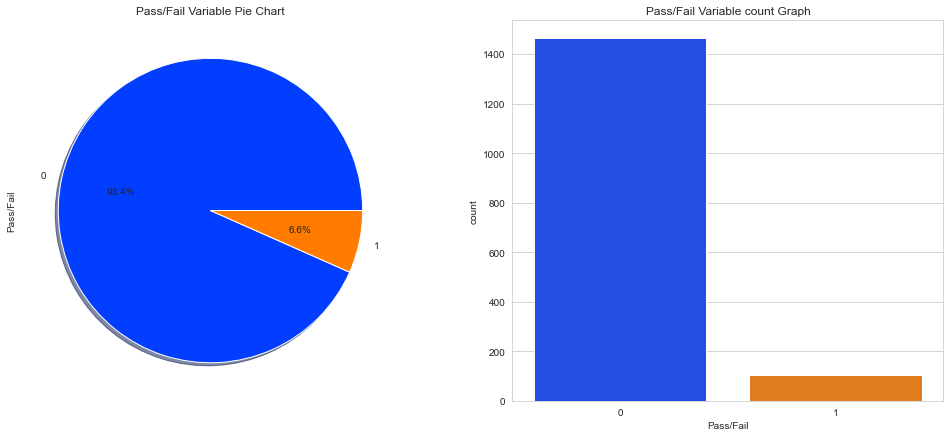

In [23]:
# ploting Bar nd pie graphs for Traget Variable.

color= sns.color_palette('bright')
f,axes=plt.subplots(1,2,figsize=(17,7))
signal_data['Pass/Fail'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True,colors=color)
sns.countplot(signal_data['Pass/Fail'],ax=axes[1],palette='bright')
axes[0].set_title('Pass/Fail Variable Pie Chart')
axes[1].set_title('Pass/Fail Variable count Graph')
plt.show()

##### Observation : From above plots we can see in our data 6.6% Semiconductors are failed and 93.4% semiconductors are passed. And We can say this could be hude imbalance target variabe.So, to balance it we use unsedsampling or oversampling.


In [24]:
# check for target balancing
# In visualization We have seen there are less no of semiconductors are falied.

y.value_counts()


0    1463
1     104
dtype: int64

#### Observation : We have seen that there is huge Unbalance in target varibale.
* So, Lets balance the target variable using Oversampling and UnderSampling techniques.
* Here We use OverSampling technique-SMOTE on Train Data. Because, information may leak to model for testing if if we use it on whole data.
* Smote is a Oversampling Technique Which increases the Minority classes by making duplicates of the Minority class data.
* If we use UnderSampling techniques we should Eliminate the Rows from majority Class in the Variable Which leads to Loose the Information.

In [25]:
# Standardise the independent variables
ss = StandardScaler()
scaled_x = ss.fit_transform(X)

In [26]:
# split the data to train and test before Balnce the target varibale.

X_train,X_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.30,random_state=1)

print('Shape of X-train :',X_train.shape)
print('Shape of Y-train :',y_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of Y-test :',y_test.shape)

Shape of X-train : (1096, 58)
Shape of Y-train : (1096,)
Shape of X_test : (471, 58)
Shape of Y-test : (471,)


In [27]:
# balance the target variable.
print('Size of Passed Semiconductors Before UpSampling:',sum(y_train==0))
print('Size of Failed Semiconductors Before UpSampling:',sum(y_train==1))

# initialize the smote
smote = SMOTE(k_neighbors=5,random_state=1)

# fit and transform the train data.
X_train_s,y_train_s = smote.fit_resample(X_train,y_train)

print('\n\nSize of Passed Semiconductors After UpSampling:',sum(y_train_s==0))
print('Size of Failed Semiconductors After UpSampling:',sum(y_train_s==1))

print('\n\nShape of X-Train After Sampling :',X_train_s.shape)
print('Shape of y-train After Sampling :',y_train_s.shape)

Size of Passed Semiconductors Before UpSampling: 1024
Size of Failed Semiconductors Before UpSampling: 72


Size of Passed Semiconductors After UpSampling: 1024
Size of Failed Semiconductors After UpSampling: 1024


Shape of X-Train After Sampling : (2048, 58)
Shape of y-train After Sampling : (2048,)


#### Check if the train and test data have similar statistical characteristics when compared with original data

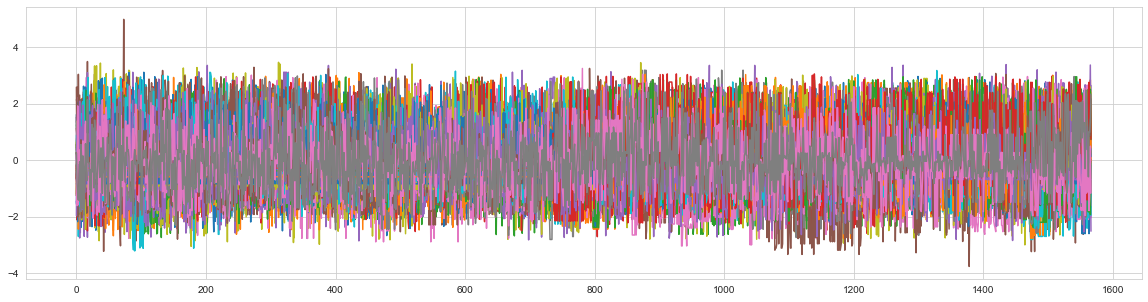

In [28]:
# Plot: Data distribution (combined data)

plt.subplots(figsize=(20,5))
plt.plot(scaled_x)
plt.show()

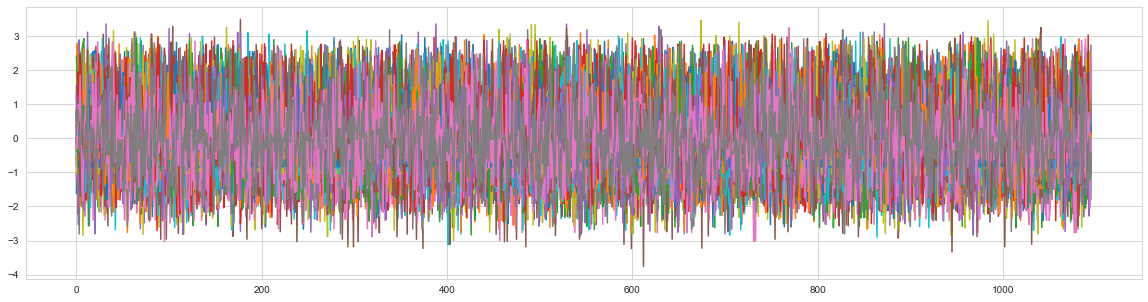

In [29]:
# Plot: Data distribution (Trained data)

plt.subplots(figsize=(20,5))
plt.plot(X_train)
plt.show()

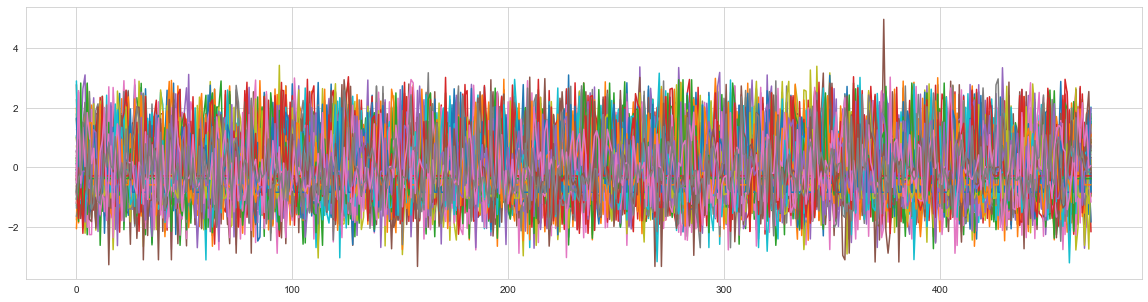

In [30]:
# Plot: Data distribution (test data)

plt.subplots(figsize=(20,5))
plt.plot(X_test)
plt.show()

In [31]:
# check for Mean Difference Between test and train data.

# convert scaled data to dataframe
train_df = pd.DataFrame(X_train,columns=X.columns)
test_df = pd.DataFrame(X_test,columns=X.columns)
original_df = pd.DataFrame(scaled_x,columns=X.columns)


In [32]:
# compare Means between Original,test and train data.

# Means of the dataframes
original_mean_df = pd.DataFrame(original_df.mean(),columns=['Original_data_mean'])
test_mean_df = pd.DataFrame(train_df.mean(),columns=['test_data_mean'])
train_mean_df = pd.DataFrame(test_df.mean(),columns=['train_data_mean'])


# mean diff between Train and original data.
train_diff_mean = 0
for i in range(0,len(original_mean_df)):
    diff1 = train_mean_df['train_data_mean'][i] - original_mean_df['Original_data_mean'][i]
    train_diff_mean = train_diff_mean+diff1

print('Mean difference Between Train data and Original data is : ',train_diff_mean)


# mean diff between Test and Original data.
test_diff_mean = 0
for i in range(0,len(original_mean_df)):
    diff2 = test_mean_df['test_data_mean'][i] - original_mean_df['Original_data_mean'][i]
    test_diff_mean = test_diff_mean+diff1

print('\n\nMean difference Between Test data and Original data is : ',test_diff_mean)

# Mean diff between Train and test data
print('\n\nDifference Between Train and Test data is :',train_diff_mean-test_diff_mean)

Mean difference Between Train data and Original data is :  -0.1816132322665584


Mean difference Between Test data and Original data is :  -1.130880662786578


Difference Between Train and Test data is : 0.9492674305200195


In [33]:
# compare Medians between Original,test and train data.

# Medians of the dataframes
original_median_df = pd.DataFrame(original_df.median(),columns=['Original_data_median'])
test_median_df = pd.DataFrame(train_df.median(),columns=['test_data_median'])
train_median_df = pd.DataFrame(test_df.median(),columns=['train_data_median'])

# median diff between Train and original data.
train_diff_median = 0
for i in range(0,len(original_median_df)):
    diff1 = train_median_df['train_data_median'][i] - original_median_df['Original_data_median'][i]
    train_diff_median = train_diff_median+diff1

print('Median difference Between Train data and Original data is : ',train_diff_median)


# median diff between Test and Original data.
test_diff_median = 0
for i in range(0,len(original_median_df)):
    diff2 = test_median_df['test_data_median'][i] - original_median_df['Original_data_median'][i]
    test_diff_median = test_diff_median+diff1

print('\n\nMedian difference Between Test data and Original data is : ',test_diff_median)

# Median diff between Train and test data
print('\n\nDifference Between Train and Test data is :',train_diff_median-test_diff_median)

Median difference Between Train data and Original data is :  -0.843262210518576


Median difference Between Test data and Original data is :  -1.2854263212608408


Difference Between Train and Test data is : 0.4421641107422648


### 5. Model training, testing and tuning:

In [34]:
# RandomForest Model
rf_model = RandomForestClassifier(max_depth=5,max_features=50,random_state=1)

# train the model
rf_model.fit(X_train_s,y_train_s)
y_pred_rf = rf_model.predict(X_test)

print('Train Accuracy :',rf_model.score(X_train_s,y_train_s))
print('\nTest Accuracy :',rf_model.score(X_test,y_test))

print('\nMacro F1-Score :',metrics.f1_score(y_pred_rf,y_test))

Train Accuracy : 0.912109375

Test Accuracy : 0.7770700636942676

Macro F1-Score : 0.2105263157894737


Observation : We have a macro F1-score of 20% which is very Low and have overfit situation that Train data is performed well but test data is not performed well.So, lets perform Cross-validation and Hypertuning to improve the F1-score.

### Cross Validation

#### We have Different Cross validation techniques.
* K-Fold Cross Validation
* Stratified K-fold Cross validation
* Leave One Out Cross validation(Loocv)
#### Loocv is good for small data size.Beacuse it Iterations and splits the data into no of Records in the data which may cause Time complex in Large datasets.So, in this Code i use only three Cross validation techniques.

#### k_fold Cross Validation

In [35]:
# kfold Validation
kfold = KFold(n_splits=15)

kfold_res = cross_val_score(RandomForestClassifier(),scaled_x,y,cv=kfold)

print('Accuracies on different K-values : \n\n',kfold_res)
print("\nAccuracy : " )
print('Mean : %0.2f'%(kfold_res.mean()*100.0))      
print('Standard Deviation : %0.2f'%(kfold_res.std()*100.0))

Accuracies on different K-values : 

 [0.83809524 0.88571429 0.85714286 0.8952381  0.94285714 0.96190476
 0.98095238 0.96153846 0.95192308 0.99038462 0.98076923 0.91346154
 0.91346154 0.94230769 0.99038462]

Accuracy : 
Mean : 93.37
Standard Deviation : 4.66


#### Stratified k_fold Cross Validation

In [36]:
# stratified k_fold
sf_kfold = StratifiedKFold(n_splits = 15)

sf_results = cross_val_score(RandomForestClassifier(), scaled_x, y, cv = sf_kfold)

print('Accuracies on different K-values : \n\n',sf_results)
print("\nAccuracy : " )
print('Mean : %0.3f'%(sf_results.mean()*100.0))      
print('Standard Deviation : %0.3f'%(sf_results.std()*100.0))

Accuracies on different K-values : 

 [0.93333333 0.93333333 0.91428571 0.93333333 0.93333333 0.93333333
 0.93333333 0.94230769 0.93269231 0.93269231 0.93269231 0.88461538
 0.93269231 0.93269231 0.93269231]

Accuracy : 
Mean : 92.916
Standard Deviation : 1.306


#### Bootstrap Validation

In [37]:
# Bootstrapping Validation
bootstrap_iterations = 15 # no of iterations
accuracies = []
rfc_model = RandomForestClassifier()

for i in range(bootstrap_iterations):
    X_train_bs,y_train_bs = resample(X_train_s,y_train_s)
    rfc_model.fit(X_train_bs,y_train_bs)
    y_pred_bs = rfc_model.predict(X_test)
    acc = metrics.accuracy_score(y_pred_bs,y_test)
    accuracies.append(acc)
    
accuracies = np.array(accuracies)
print('Accuracy Score')
print('Mean : %0.3f'%(accuracies.mean()*100))
print('Standard deviation: %0.3f'%(accuracies.std()*100))

Accuracy Score
Mean : 92.003
Standard deviation: 0.476


### Hyper Tuning

#### Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. Two best strategies for Hyperparameter tuning are:
#### GridSearchCV : 
* In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.
  
  
#### RandomizedSearchCV :
* RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.

#### GridSearchCV

In [38]:
# parameters for random forest

param_grid_rf = {'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100],
 'criterion' : ['gini','entropy']}

rfcl = RandomForestClassifier()

# train across 5 folds
grid_rfcl = GridSearchCV(rfcl, param_grid_rf, cv=5,scoring='accuracy', n_jobs= -1, verbose = 1)

grid_rfcl.fit(scaled_x,y)

print('\nBest Parameters are:',grid_rfcl.best_params_)
print('\nBest Score: %0.2f'%grid_rfcl.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits

Best Parameters are: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

Best Score: 0.93


#### RandomizedSearchCV

In [39]:
# parameters for random forest

param_grid_rf = {'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100],
 'criterion' : ['gini','entropy'],
 'random_state' : [1,5,10,16,21,42]}

rfcl = RandomForestClassifier()

random_rfcl = RandomizedSearchCV(rfcl,param_grid_rf,cv=5,scoring='accuracy',n_jobs=-1,verbose=1,random_state=1)

random_rfcl.fit(X_train_s,y_train_s)

print('\nBest Parameters are:',random_rfcl.best_params_)
print('\nBest Score: %0.2f'%random_rfcl.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters are: {'random_state': 16, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}

Best Score: 0.96


#### Observation : 
We have seen that both Tunning Techniques gives the Same Accuracy But different Parameters and GridSearchCV take moree time to find but RandomSearchCV finds the best Accuracy in less time.So, RandomSearchCV will be best to Seearch for best Parameters of the model in less time.

#### Best Parameters are: 
* n_estimators: 100 
* min_samples_split: 10
* min_samples_leaf: 2
* criterion : 'gini'
* max_features: 'log2'
* max_depth: 5
* bootstrap: True

In [40]:
# traing model with best parameters.

rfcl_best = RandomForestClassifier(n_estimators=50,
                                   min_samples_leaf=1,
                                   min_samples_split=5,
                                   max_features='auto',
                                   max_depth=10,
                                   criterion='entropy',
                                   bootstrap=False,random_state=16)

rfcl_best.fit(X_train_s,y_train_s)
y_pred_rf = rfcl_best.predict(X_test)
print('Train Accuracy : ',rfcl_best.score(X_train_s,y_train_s))
score = rfcl_best.score(X_test,y_test)
print('Test Accuracy : ',score)
print('\nF1-Score : ',metrics.f1_score(y_pred_rf,y_test,average='macro'))

Train Accuracy :  0.98876953125
Test Accuracy :  0.8853503184713376

F1-Score :  0.5833224115334207


 Observation : After Hyper tuning We have seen that we have got 5% increase in Accuracy and 30% increase in F1 Score.So, lets perform Dimensionality reduction techniques which may Increase the Accuracy and F1-score of the Model.

### Dimesionality Reduction
The various methods used for dimensionality reduction,but most used Technique is PCA.
#### Principal Component Analysis(PCA)
It involves the following steps:

* Construct the covariance matrix of the data.
* compute the eigenvectors of this matrix.
* Eigenvectors corresponding to the largest eigenvalues are used to reconstruct a large fraction of variance of the original data.


In [41]:
# performing pca

pca = PCA(n_components=len(X.columns))
pca.fit(X_train_s)

print('Eigen Values : \n\n',pca.explained_variance_)
print('\n\nEigen vectors : \n\n',pca.components_)

Eigen Values : 

 [4.351543   3.44129976 2.76721098 2.52519295 1.94059292 1.87081111
 1.7312779  1.57969057 1.53488179 1.48040787 1.39561005 1.31714902
 1.27901064 1.20538596 1.11930191 1.04324013 0.97701108 0.94718931
 0.91022594 0.89167227 0.86418145 0.82198019 0.77496959 0.74354108
 0.7275725  0.68963398 0.67800693 0.67067264 0.6363975  0.62321165
 0.57597957 0.566041   0.52378559 0.50699585 0.49112457 0.46736877
 0.46305527 0.45020252 0.43808834 0.41489086 0.40578344 0.36062279
 0.34519088 0.32559421 0.30193056 0.26256023 0.25034235 0.22980277
 0.18352601 0.13431886 0.12279855 0.11355443 0.1056585  0.10311889
 0.09126446 0.0801553  0.07000305 0.05670565]


Eigen vectors : 

 [[ 0.06702797  0.04054449  0.09836098 ...  0.1211758  -0.01062304
   0.11993582]
 [-0.08498632  0.01202743 -0.02441156 ... -0.19124991 -0.17007573
  -0.13067928]
 [ 0.02288666  0.15017309  0.03755546 ...  0.10060095  0.02402512
   0.15219679]
 ...
 [ 0.01444223  0.06317939 -0.0026622  ... -0.37993569 -0.0158379

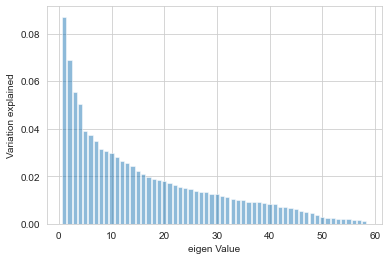

In [42]:
# plot bar plot for Explained_variance vs Eigen values
plt.bar(list(range(1,len(X.columns)+1)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

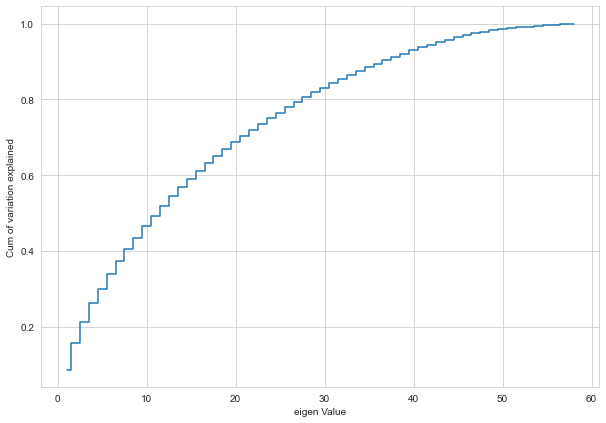

In [43]:
# plot step plot for Explained_variance vs Eigen values
plt.figure(figsize=(10,7))
plt.step(list(range(1,len(X.columns)+1)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Obseravtion: We can see from above plot 45 columns will be best for Modeling.So, lets perform pca with 45 columns.

In [44]:
# perform pca with 45 columns.
pca1 = PCA(n_components=48)

X_train_pca = pca1.fit_transform(X_train_s)
X_test_pca = pca1.fit_transform(X_test)

In [45]:
# traing model with best parameters with 45 columns.

rfcl_best_pca = RandomForestClassifier(n_estimators=100,
                                   min_samples_leaf=2,
                                   min_samples_split=10,
                                   max_features='log2',
                                   max_depth=5,
                                   criterion='gini',
                                   bootstrap=True,random_state=42)

rfcl_best_pca.fit(X_train_pca,y_train_s)
y_pred_rf = rfcl_best_pca.predict(X_test_pca)
print('Train Accuracy : ',rfcl_best_pca.score(X_train_pca,y_train_s))
score = rfcl_best_pca.score(X_test_pca,y_test)
print('Test Accuracy : ',score)
print('\nF1-Score : ',metrics.f1_score(y_pred_rf,y_test,average='macro'))
print('\nClassification report : \n',metrics.classification_report(y_test,y_pred_rf))

Train Accuracy :  0.97119140625
Test Accuracy :  0.7303609341825902

F1-Score :  0.45761436278732376

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       439
           1       0.05      0.16      0.07        32

    accuracy                           0.73       471
   macro avg       0.49      0.46      0.46       471
weighted avg       0.87      0.73      0.79       471



Observation : When We reduce the columns the Accuracy and F1-score is decreased.so, PCA is not performed well For the data.All the columns are Important for Classification of Semiconductors.When We see the Classification report that classification of Passed Semiconductors are classified well and Failed semiconductors classified badly.Because of the very huge target imbalance.

#### Find Best Model

In [46]:
# define Methods for Different Techniques.

# train the model
def train_model(model):
    model.fit(X_train_s,y_train_s)
    pred = model.predict(X_test)
    print('Train Accuracy :',model.score(X_train_s,y_train_s))
    print('\nTest Accuracy :',model.score(X_test,y_test))
    print('\nMacro F1-Score :',metrics.f1_score(pred,y_test,average='macro'))
    print('\n------------------------------------------------------\n')

    
# define Cross validate Scores
def cvs(model):
    kfold = KFold(n_splits=15)
    result = cross_val_score(model,scaled_x,y,cv=kfold)
    print('K-fold Cross validation\n')
    print('Accuracies on different K-values : \n\n',result)
    print("\nAccuracy : " )
    print('Mean : %0.2f'%(result.mean()*100.0))      
    print('Standard Deviation : %0.2f'%(result.std()*100.0))
    print('\n------------------------------------------------------\n')

    
# define randomsearchcv hypertuning
def hyper_tuning(model,params):
    print('HyperTuning')
    randomcv = RandomizedSearchCV(model,params,cv=5,scoring='accuracy',n_jobs=-1,verbose=1,random_state=1)
    randomcv.fit(X_train_s,y_train_s)
    print('\nBest Parameters are:',randomcv.best_params_)
    print('\nBest Score: %0.2f'%randomcv.best_score_)
    print('\n------------------------------------------------------\n')


# define a pca
def p_c_a(model):
    model.fit(X_train_pca,y_train_s)
    pred = model.predict(X_test_pca)
    print('Train Accuracy : ',model.score(X_train_pca,y_train_s))
    score = model.score(X_test_pca,y_test)
    print('Test Accuracy : ',score)
    print('\nF1-Score : ',metrics.f1_score(pred,y_test,average='macro'))
    print('\nClassification report : \n',metrics.classification_report(y_test,pred))
    print('\n------------------------------------------------------\n')



##### Note : Lets use Pipeline to Process all the functiona at a time.

#### Logistic Regression Model

In [47]:
# intialize the model and make parameters for the model
lg = LogisticRegression()

lg_params = {'C': [1.0,2.0],
             'class_weight': [None,2], 
             'intercept_scaling': [1,2], 
             'max_iter': [100,150],
             'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
             'random_state': [1,5,10], 
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            }

# make a pipepline for logistic regression
make_pipeline(train_model(lg),cvs(lg),hyper_tuning(lg,lg_params),p_c_a(lg))

Train Accuracy : 0.8134765625

Test Accuracy : 0.7409766454352441

Macro F1-Score : 0.5313662164807202

------------------------------------------------------

K-fold Cross validation

Accuracies on different K-values : 

 [0.81904762 0.85714286 0.80952381 0.8952381  0.94285714 0.96190476
 0.98095238 0.96153846 0.95192308 0.99038462 0.98076923 0.92307692
 0.89423077 0.94230769 0.99038462]

Accuracy : 
Mean : 92.68
Standard Deviation : 5.76

------------------------------------------------------

HyperTuning
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters are: {'solver': 'newton-cg', 'random_state': 1, 'penalty': 'none', 'max_iter': 150, 'intercept_scaling': 1, 'class_weight': 2, 'C': 1.0}

Best Score: 0.80

------------------------------------------------------

Train Accuracy :  0.798828125
Test Accuracy :  0.5562632696390658

F1-Score :  0.43528743610778065

Classification report : 
               precision    recall  f1-score   support

           0    

Pipeline(steps=[('nonetype-1', None), ('nonetype-2', None),
                ('nonetype-3', None), ('nonetype-4', None)])

Observation : We have seen that after Performing PCA the Accuracy is Lost and down to overfit condition.So, find the Accuracie for model with best parameters.

Best Parameters for Logistic regression are :
* 'solver': 'newton-cg' 
* 'random_state': 1
* 'penalty': None
* 'max_iter': 150
* 'intercept_scaling': 1
* 'class_weight': 2
* 'C': 1.0

In [48]:
# Make the LogisticRegression model with Best parameters
lg_best = LogisticRegression(solver='newton-cg',
                             random_state=1,
                             penalty='none',
                             max_iter=150,
                             intercept_scaling=1,
                             class_weight=2,
                             C=1.0)

#### Naive Bayes Classifier

In [49]:
# intialize the model
nb = GaussianNB()
# make a pipepline for Naive Bayes
make_pipeline(train_model(nb),cvs(nb),p_c_a(nb))

Train Accuracy : 0.7578125

Test Accuracy : 0.7070063694267515

Macro F1-Score : 0.5178762164728222

------------------------------------------------------

K-fold Cross validation

Accuracies on different K-values : 

 [0.40952381 0.42857143 0.64761905 0.8        0.86666667 0.83809524
 0.80952381 0.96153846 0.95192308 0.96153846 0.97115385 0.90384615
 0.90384615 0.94230769 0.99038462]

Accuracy : 
Mean : 82.58
Standard Deviation : 18.12

------------------------------------------------------

Train Accuracy :  0.92529296875
Test Accuracy :  0.8259023354564756

F1-Score :  0.5061125319693094

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       439
           1       0.08      0.16      0.11        32

    accuracy                           0.83       471
   macro avg       0.51      0.52      0.51       471
weighted avg       0.88      0.83      0.85       471


----------------------------------------------

Pipeline(steps=[('nonetype-1', None), ('nonetype-2', None),
                ('nonetype-3', None)])

Observation : We can see that in Naive Bayes Classifier after Performing pca the All the scores are Increased so We use the Pca data to find the best score of Naive Bayes.

#### KNN Classifier

In [50]:
# intialize the model and make parameters for the model
knn = KNeighborsClassifier(n_neighbors=5)

knn_params = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'metric': ['minkowski','manhatten','chedyshev'], 
              'n_neighbors': [3,5,7,9,11], 
              'weights': ['uniform','distance']
             }

# make a pipepline for KNeighbors Classifier
make_pipeline(train_model(knn),cvs(knn),hyper_tuning(knn,knn_params),p_c_a(knn))

Train Accuracy : 0.802734375

Test Accuracy : 0.49469214437367304

Macro F1-Score : 0.4048483690112131

------------------------------------------------------

K-fold Cross validation

Accuracies on different K-values : 

 [0.83809524 0.87619048 0.86666667 0.88571429 0.94285714 0.96190476
 0.98095238 0.96153846 0.95192308 0.99038462 0.98076923 0.91346154
 0.91346154 0.94230769 0.99038462]

Accuracy : 
Mean : 93.31
Standard Deviation : 4.69

------------------------------------------------------

HyperTuning
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters are: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski', 'algorithm': 'ball_tree'}

Best Score: 0.76

------------------------------------------------------

Train Accuracy :  0.80908203125
Test Accuracy :  0.2611464968152866

F1-Score :  0.2476867151354924

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.21      0.35       439
  

Pipeline(steps=[('nonetype-1', None), ('nonetype-2', None),
                ('nonetype-3', None), ('nonetype-4', None)])

Observation : We have seen that in knn the model is highly overfitted and After Performing PCA it is badly Predicting the Test data.So, we cannot use pca data for Knn model.

Best Parameters for KNN are :
* 'weights': 'distance'
* 'n_neighbors': 3
* 'metric': 'minkowski'
* 'algorithm': 'ball-tree'

In [51]:
# make the Knn model with Best Parameters.
knn_best = KNeighborsClassifier(weights='distance',
                                n_neighbors = 3,
                                metric='minkowski',
                                algorithm='ball_tree')

#### Support Vector Machine (SVM)

In [52]:
# intialize the model and make parameters for the model
svm_model = SVC(gamma=0.25,probability=True)

svm_params = {'C': [0.25,0.5,0.75,1.0],
              'decision_function_shape': ['ovo', 'ovr'], 
              'gamma': ['scale', 'auto'], 
              'kernel':['linear', 'poly', 'rbf'] ,
              'random_state': [1,5,10]}
# make a pipepline for SVC
make_pipeline(train_model(svm_model),cvs(svm_model),hyper_tuning(svm_model,svm_params),p_c_a(svm_model))

Train Accuracy : 1.0

Test Accuracy : 0.9320594479830149

Macro F1-Score : 0.4824175824175824

------------------------------------------------------

K-fold Cross validation

Accuracies on different K-values : 

 [0.83809524 0.88571429 0.85714286 0.8952381  0.94285714 0.96190476
 0.98095238 0.96153846 0.95192308 0.99038462 0.98076923 0.91346154
 0.91346154 0.94230769 0.99038462]

Accuracy : 
Mean : 93.37
Standard Deviation : 4.66

------------------------------------------------------

HyperTuning
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters are: {'random_state': 1, 'kernel': 'rbf', 'gamma': 'scale', 'decision_function_shape': 'ovo', 'C': 0.5}

Best Score: 0.98

------------------------------------------------------

Train Accuracy :  1.0
Test Accuracy :  0.9320594479830149

F1-Score :  0.4824175824175824

Classification report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       439
           1 

Pipeline(steps=[('nonetype-1', None), ('nonetype-2', None),
                ('nonetype-3', None), ('nonetype-4', None)])

Observation : We have seen that After Performing PCA F1-score increased to 48% and have good train and test accuracies.So, We can use pca data and best parameters to find the model.

Best Parameters for SVC are :
* 'random_state': 1
* 'kernel': 'rbf'
* 'gamma': 'scale'
* 'decision_function_shape': 'ovo'
* 'C': 0.5

In [53]:
# make the svm model with best parameters
svc_best = SVC(random_state=1,
               kernel='rbf',
               gamma='scale',
               decision_function_shape='ovo',
               C=0.5,
               probability = True)

#### Decision Tree Classifier

In [54]:
# intialize the model and make parameters for the model
dtree = DecisionTreeClassifier(random_state=1)

dtree_params = {'criterion': ['gini','entropy'], 
                'max_depth': [5,10,15], 
                'max_features': ["auto", "sqrt", "log2"], 
                'max_leaf_nodes': [10,30,50], 
                'min_impurity_split': [0.25,0.50], 
                'min_samples_leaf': [1,5,10], 
                'min_samples_split': [2,10,15],
                'random_state': [1,5,10,16,21,42], 
                'splitter':['best','random']}

# make a pipepline for Decision tree Classifier
make_pipeline(train_model(dtree),cvs(dtree),hyper_tuning(dtree,dtree_params),p_c_a(dtree))

Train Accuracy : 1.0

Test Accuracy : 0.8471337579617835

Macro F1-Score : 0.5294705294705294

------------------------------------------------------

K-fold Cross validation

Accuracies on different K-values : 

 [0.61904762 0.78095238 0.78095238 0.84761905 0.85714286 0.9047619
 0.94285714 0.89423077 0.91346154 0.92307692 0.90384615 0.875
 0.78846154 0.91346154 0.92307692]

Accuracy : 
Mean : 85.79
Standard Deviation : 8.23

------------------------------------------------------

HyperTuning
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters are: {'splitter': 'best', 'random_state': 10, 'min_samples_split': 10, 'min_samples_leaf': 10, 'min_impurity_split': 0.25, 'max_leaf_nodes': 50, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}

Best Score: 0.81

------------------------------------------------------

Train Accuracy :  1.0
Test Accuracy :  0.7855626326963907

F1-Score :  0.4760729980065421

Classification report : 
               precision  

Pipeline(steps=[('nonetype-1', None), ('nonetype-2', None),
                ('nonetype-3', None), ('nonetype-4', None)])

Observation : We have seen that in DTree the model is highly overfitted and After Performing PCA it is badly Predicting the Test data but have good F1-score.So, we can use pca data with best parameters for dtree model.

Best Parameters for dtree are :
* 'splitter': 'best'
* 'random_state': 10
* 'min_samples_split': 10
* 'min_samples_leaf': 10
* 'min_impurity_split': 0.25
* 'max_leaf_nodes': 50
* 'max_features': 'sqrt'
* 'max_depth': 15
* 'criterion': 'gini'

In [55]:
# make the decision tree model with best parameters
dtree_best = DecisionTreeClassifier(random_state=10,
                                    max_depth=15,
                                    max_features='sqrt',
                                    splitter = 'best',
                                    min_samples_split = 10,
                                    min_samples_leaf = 10,
                                    min_impurity_split = 0.25,
                                    max_leaf_nodes = 50,
                                    criterion = 'gini')

#### Bagging Classifier

In [56]:
# intialize the model and make parameters for the model
bgcl = BaggingClassifier(base_estimator= dtree, random_state=1)

bgcl_params = {'base_estimator': [lg,nb,knn,svm_model,dtree],
               'max_features': [10,20,30],
               'max_samples': [10,50,100,500],
               'n_estimators': [10,15,20,50,100],
               'n_jobs': [None,-1], 
               'random_state': [1,5,10,16,21,42],
               'bootstrap':[True,False]}
# make a pipepline for Bagging classifier
make_pipeline(train_model(bgcl),cvs(bgcl),hyper_tuning(bgcl,bgcl_params),p_c_a(bgcl))

Train Accuracy : 0.99951171875

Test Accuracy : 0.9002123142250531

Macro F1-Score : 0.5128408265663168

------------------------------------------------------

K-fold Cross validation

Accuracies on different K-values : 

 [0.81904762 0.87619048 0.84761905 0.8952381  0.92380952 0.96190476
 0.98095238 0.96153846 0.94230769 0.99038462 0.97115385 0.86538462
 0.91346154 0.94230769 0.99038462]

Accuracy : 
Mean : 92.54
Standard Deviation : 5.25

------------------------------------------------------

HyperTuning
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters are: {'random_state': 10, 'n_jobs': -1, 'n_estimators': 20, 'max_samples': 100, 'max_features': 10, 'bootstrap': False, 'base_estimator': SVC(gamma=0.25, probability=True)}

Best Score: 0.91

------------------------------------------------------

Train Accuracy :  0.9990234375
Test Accuracy :  0.8577494692144374

F1-Score :  0.5025458328735596

Classification report : 
               precision    recall 

Pipeline(steps=[('nonetype-1', None), ('nonetype-2', None),
                ('nonetype-3', None), ('nonetype-4', None)])

Observation : We have seen that All the Accuracies are Increased after Perform PCA.so, we take Pca data for the model.

Best Parameters for bagging Classifier are:
* 'random_state': 10
* 'n_jobs': -1
* 'n_estimators': 20
* 'max_samples': 100
* 'max_features': 10
* 'bootstrap': False
* 'base_estimator': SVC()

In [57]:
# make the bagging classifier model with best parameters
bgcl_best = BaggingClassifier(random_state=10,
                              base_estimator=svm_model,
                              n_estimators = 20,
                              max_samples=100,
                              max_features=10,
                              bootstrap=False,
                              n_jobs=-1)

#### Ada Boost Classifier

In [58]:
# intialize the model and make parameters for the model
adcl = AdaBoostClassifier(base_estimator= dtree, random_state=1)

adcl_params = {'algorithm': ['SAMME','SAMME.R'],
               'base_estimator': [lg,nb,knn,svm_model,dtree],
               'learning_rate': [1.0,2.0],
               'n_estimators': [50,100,150],
               'random_state': [1,5,10,21,42]}
# make a pipepline for AdaboostClassifier
make_pipeline(train_model(adcl),cvs(adcl),hyper_tuning(adcl,adcl_params),p_c_a(adcl))

Train Accuracy : 1.0

Test Accuracy : 0.8577494692144374

Macro F1-Score : 0.5146943483275662

------------------------------------------------------

K-fold Cross validation

Accuracies on different K-values : 

 [0.59047619 0.76190476 0.78095238 0.83809524 0.9047619  0.9047619
 0.96190476 0.88461538 0.92307692 0.92307692 0.90384615 0.86538462
 0.78846154 0.90384615 0.95192308]

Accuracy : 
Mean : 85.91
Standard Deviation : 9.29

------------------------------------------------------

HyperTuning
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters are: {'random_state': 10, 'n_estimators': 50, 'learning_rate': 1.0, 'base_estimator': SVC(gamma=0.25, probability=True), 'algorithm': 'SAMME.R'}

Best Score: 0.99

------------------------------------------------------

Train Accuracy :  1.0
Test Accuracy :  0.7791932059447984

F1-Score :  0.4647727272727273

Classification report : 
               precision    recall  f1-score   support

           0       0.93    

Pipeline(steps=[('nonetype-1', None), ('nonetype-2', None),
                ('nonetype-3', None), ('nonetype-4', None)])

Observation : We have seen that All the Accuracies are Increased after Perform PCA.so, we take Pca data for the model.

Best Parameters for Adaboost Classifier are:
* 'random_state': 10
* 'n_estimators': 50
* 'learning_rate': 1.0
* 'base_estimator': SVC(gamma=0.25, probability=True)
* 'algorithm': 'SAMME.R'

In [59]:
# make the AdaBoost classifier with best parameters
adcl_best = AdaBoostClassifier(random_state=10,
                               n_estimators=50,
                               learning_rate=1.0,
                               base_estimator=svm_model,
                               algorithm='SAMME.R')

#### Gradient Boosting Classifier

In [60]:
# intialize the model and make parameters for the model
gbcl = GradientBoostingClassifier(random_state=1)

gbcl_params = {'ccp_alpha': [0.0,0.1],
 'criterion': ['friedman_mse','msa','mse'],
 'learning_rate': [0.1,0.2,0.5],
 'loss': ['deviance', 'exponential'],
 'max_depth': [3,5,10],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_leaf_nodes': [5,10,20],
 'min_impurity_split': [0.25,0.5],
 'min_samples_leaf': [1,2,5],
 'min_samples_split': [2,5,10,50],
 'n_estimators': [100,150,200],
 'random_state': [1,5,10,21,42]}

# make a pipepline for Gradient Boost Classifier
make_pipeline(train_model(gbcl),cvs(gbcl),hyper_tuning(gbcl,gbcl_params),p_c_a(gbcl))

Train Accuracy : 0.9931640625

Test Accuracy : 0.8938428874734607

Macro F1-Score : 0.5683651026392962

------------------------------------------------------

K-fold Cross validation

Accuracies on different K-values : 

 [0.78095238 0.85714286 0.83809524 0.8952381  0.92380952 0.96190476
 0.98095238 0.96153846 0.95192308 0.99038462 0.98076923 0.88461538
 0.89423077 0.94230769 0.99038462]

Accuracy : 
Mean : 92.23
Standard Deviation : 6.04

------------------------------------------------------

HyperTuning
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters are: {'random_state': 10, 'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 1, 'min_impurity_split': 0.5, 'max_leaf_nodes': 10, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'mse', 'ccp_alpha': 0.0}

Best Score: 0.87

------------------------------------------------------

Train Accuracy :  0.9990234375
Test Accuracy :  0.7940552016985138


Pipeline(steps=[('nonetype-1', None), ('nonetype-2', None),
                ('nonetype-3', None), ('nonetype-4', None)])

Observation : We have seen that All the Accuracies are Increased after Perform PCA.so, we take Pca data for the model.

Best Parameters for Gradient Boosting Classifier are:
* 'random_state': 10
* 'n_estimators': 200
* 'min_samples_split': 50
* 'min_samples_leaf': 1
* 'min_impurity_split': 0.5
* 'max_leaf_nodes': 10
* 'max_features': 'sqrt'
* 'max_depth': 3
* 'loss': 'exponential'
* 'learning_rate': 0.1
* 'criterion': 'mse'
* 'ccp_alpha': 0.0

In [61]:
# make gradient Boost Classifier with best parameters
gbcl_best = GradientBoostingClassifier(random_state=10,
                                       n_estimators=200,
                                       min_samples_split=50,
                                       min_samples_leaf=1,
                                       min_impurity_split=0.5,
                                       max_leaf_nodes=10,
                                       max_features='sqrt',
                                       max_depth=3,
                                       loss='exponential',
                                       learning_rate=0.1,
                                       criterion='mse',
                                       ccp_alpha=0.0)

##### Observation : We Performed Cross Validation,Hyper Parameter Tunning and PCA with different models, Lets find the best scores among the following models using Best parameters and Best data.

* we have seen Some models performed well before Perform PCA and After Perform PCA they perform Very Badly and Some model performed well after perform pca.
* Apart From KNN,Random forest we can use pca data for modelin the data.
* so lets make a function which gives the different metric scores of the models.
* First Find all metrics for all Models with normal data.
* Next Find all Metrics for All models with pca data.

In [62]:
# make final model
def final_modeling(model,train_x,X_test):
    # fit the model
    model.fit(train_x,y_train_s)
    # predict the classes
    pred = model.predict(X_test)
    predict = model.predict_proba(X_test)
    # train Accuracy
    train_acc =('%0.3f'%(model.score(train_x,y_train_s)*100))
    # test Accuracy
    test_acc = ('%0.3f'%(model.score(X_test,y_test)*100))
    # f1 score
    F1 = ('%0.3f'%(metrics.f1_score(pred,y_test,average='macro')*100))
    # recall score
    Recall_score = ('%0.3f'%(metrics.recall_score(pred,y_test,average='macro')*100))
    # Roc score
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predict[:,1])
    roc_auc =('%0.3f' %(metrics.auc(fpr,tpr)*100))
    # return the metrics
    return train_acc,test_acc,F1,Recall_score,roc_auc

#### Best Models With PCA Data

In [63]:
result_pca = {}   # Create an empty dictionary to later use to store metrics of each of the models
# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lg_best,nb,knn_best,svc_best,dtree_best,bgcl_best,adcl_best,gbcl_best,rfcl_best], ['Logistic Regression','Naive Bayes',
                                                                       'KNN','SVC','Decision Tree','Bagging Ensemble', 
                                                                       'AdaBoosting', 'Gradient Boosting','Random Forest']):
    result_pca[name] = final_modeling(model,X_train_pca,X_test_pca)

In [64]:
result_data_pca = pd.DataFrame(np.array(list(result_pca.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                      columns= ['Train_acc','Test_acc','Macro_F1','Macro_Recall','ROC_score'],
                      index= result_pca.keys())   # use the model names as index

result_data_pca.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result_data_pca

Train_acc Test_acc Macro_F1 Macro_Recall ROC_score
Model                                                                 
Logistic Regression    79.883   55.626   43.529       52.977    65.362
Naive Bayes            92.529   82.590   50.611       50.882    44.533
KNN                   100.000   30.361   28.129       53.344    61.318
SVC                    99.609   82.166   53.824       53.561    62.450
Decision Tree          87.354   67.941   45.048       49.392    47.921
Bagging Ensemble       96.240   86.412   49.280       49.330    55.965
AdaBoosting           100.000   93.206   48.242       46.603    58.001
Gradient Boosting      91.602   69.427   44.110       48.181    45.259
Random Forest          99.072   82.590   47.536       48.255    40.796

#### Best Models With Normal Data

In [65]:
result_normal = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lg_best,nb,knn_best,svc_best,dtree_best,bgcl_best,adcl_best,gbcl_best,rfcl_best], ['Logistic Regression','Naive Bayes',
                                                                       'KNN','SVC','Decision Tree','Bagging Ensemble', 
                                                                       'AdaBoosting', 'Gradient Boosting','Random Forest']):
    result_normal[name] = final_modeling(model,X_train_s,X_test)

In [66]:
result_data_normal = pd.DataFrame(np.array(list(result_normal.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                      columns= ['Train_acc','Test_acc','Macro_F1','Macro_Recall','ROC_score'],
                      index= result_normal.keys())   # use the model names as index

result_data_normal.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result_data_normal

Train_acc Test_acc Macro_F1 Macro_Recall ROC_score
Model                                                                 
Logistic Regression    81.348   74.098   53.137       54.693    72.202
Naive Bayes            75.781   70.701   51.788       54.609    71.476
KNN                   100.000   54.989   43.688       53.617    64.119
SVC                    99.609   92.781   55.615       65.618    72.067
Decision Tree          88.916   77.495   50.779       51.857    65.354
Bagging Ensemble       94.141   89.809   54.434       55.201    67.953
AdaBoosting           100.000   93.206   48.242       46.603    67.120
Gradient Boosting      89.990   81.741   57.725       56.732    78.331
Random Forest          98.877   88.535   58.332       57.755    74.103

#### Observation : We have seen from above 2 datas,

* With PCA data,SVC Model has high roc-score and Performed well on Train and test data,Bagging Classifier also performed well.
* Without PCA data, three Models performed well i.e., SVC, GradientBoosting and random Forest. But random forest is in Overfit Condition.
* So, PCA is not performed well in this data 
* So, According to all Metrics scores SVC Will be best Model to Predict the Pass/Fail of the Semiconductors.

#### For this Data Support Vector Classifier Will be Best model.

* Because it performed well in both the Cases and has good metric scores and have a Roc-score of 72%.

##### From all Above Modeling techniques Support Vector Classifier Will be best Model.So, lets  save the model for futher use using Pickle.

In [67]:
import pickle

with open("SVM.pickle" , "wb") as svcfile:
    pickle.dump(svc_best, svcfile)

In [68]:
pickle_model = open("SVM.pickle" , "rb")
gbc_model = pickle.load(pickle_model)

In [69]:
# import future-predictions data and predict the class using best model.
future_data = pd.read_excel('Future_predictions.xlsx')
future_data.head()

Time        0        1          2          3       4    5  \
0 2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100   
1 2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100   
2 2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100   
3 2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100   
4 2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100   

          6       7       8  ...     580       581     582     583     584  \
0   97.6133  0.1242  1.5005  ...     NaN       NaN  0.5005  0.0118  0.0035   
1  102.3433  0.1247  1.4966  ...  0.0060  208.2045  0.5019  0.0223  0.0055   
2   95.4878  0.1241  1.4436  ...  0.0148   82.8602  0.4958  0.0157  0.0039   
3  104.2367  0.1217  1.4882  ...  0.0044   73.8432  0.4990  0.0103  0.0025   
4  100.3967  0.1235  1.5031  ...     NaN       NaN  0.4800  0.4766  0.1045   

       585     586     587     588       589  
0   2.3630     NaN     NaN     NaN       NaN  
1   4.4447  0.0096  0.0201  0.0060  208.2045  
2   3.1745  0.0584  0.0484  0.0148   82.8602  
3   2.0544  0.0202  0.0149  0.0044   73.8432  
4  99.3032  0.0202  0.0149  0.0044   73.8432  

[5 rows x 591 columns]

In [70]:
# store the columns which are used in model Building.
data_predict = {}
for col in signal_data.columns.drop('Pass/Fail'):
    data_predict[col] = future_data[int(col)]

In [71]:
# convert to data frame.
data = pd.DataFrame.from_dict(data_predict)
# check for Null values
data.isna().sum().sum()

1

In [72]:
# replace Null values with 0.
data.fillna(0,inplace=True)

In [73]:
# predict the data.

predict_data = gbc_model.predict(data)
predict_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

### 6. Conclusion and improvisation:

* In this Project the data contains too many columns but have some huge outliers,same means in different classes and high correlated columns.
* After dropping the unnecessary columns the data Would be good and Well predict the Classes. But the main Problem is Data have huge imbalance target class Which is around only 6% of rows contains the other type class.
* Due to Imbalance in Target varibale the models are failed to predict the type-2 class even after perform the smote.
* Because Smote needs to balance the data by making duplicates so it may have to make thrice or greater the no of duplicates for the each row in the type-2 class.
* So, if data has 7:3 ratio target varibale may get better results in the modelling.
* We have dropped unnecessary columns before modeling using t-test,pearlsons correlation due to that PCA may not performed well.But in some modles it performed well.
* Finally, SVC model will be the good pick for the data Which gives the high train and test Accuracies with 57% Accuracy Score and have Roc-score of 70% will be good enough among other models.  